# Machine Learning Lab 1

## Assignment 2 (Deadline : 22/10/2020 11:59PM)

Total Points : 50

### 1. Read the data into numpy array

In [1]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection  import train_test_split

df = pd.read_csv('data.csv', header=None, skiprows= 1)
df.columns =['x1','x2', 'y']
df.head()

,x1,x2,y
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


### 2. Plot and Explore the data to get a better understanding

In [2]:
df.describe()

,x1,x2,y
count,3000.000000,3000.00000,3000.000000
mean,-18.483293,31.24422,-11.450140
std,34.398479,42.99015,662.873355
min,-140.710000,-132.18000,-2325.790000
25%,-40.392500,3.38250,-446.140000
50%,-18.485000,31.34500,-17.680000
75%,4.125000,60.59000,429.782500
max,93.930000,189.99000,2198.490000


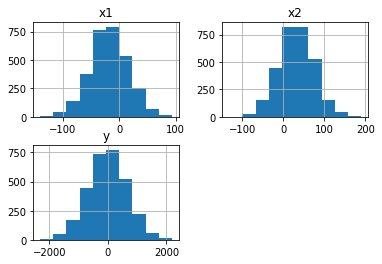

In [3]:
df.hist()
plt.show()

### 3. Prepare the data for modelling. (8 points)

In [4]:
# Separate the data: input and output.

X = df[['x1','x2']]
y = df['y']

In [5]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
# From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?

X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=42)

#### Why not stratified sampling?
Our dependent Y variable is continous and in order to stratify it we would need to split the variables into bins. These bins further would be used while finding for a representative test sample. Now, identifying the number of bins, the size of bins and also find a exhaustive set of classes for each element in the data is very difficult.

### 4. Modelling

#### 4.1. Linear Regression (8 points)

In [6]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Regressor = LinearRegression().fit(X_tv, y_tv)
lr_predict_tv = Regressor.predict(X_tv)
lr_predict_test = Regressor.predict(X_test)

lr_net_results = {'model': 'Linear Regression',
                    'train_mse' : round(mean_squared_error(y_tv, lr_predict_tv),2),
                      'test mse' : round(mean_squared_error(y_test, lr_predict_test),2),
                      'train_mae':round(mean_absolute_error(y_tv, lr_predict_tv),2),
                      'test_mae':round(mean_absolute_error(y_test, lr_predict_test),2)}

#### 4.2. Ridge Regression (8 points)

Identify the right alpha using the validation data

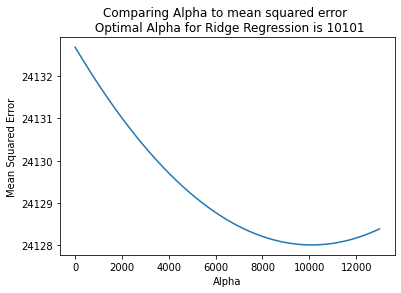

In [19]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Ridge

alphas = np.arange(0,13000, 1)

mse_list = []
optimal_alpha = None
optimal_val_mse = np.inf

for alpha in alphas:
    Regressor = Ridge(alpha=alpha).fit(X_train,y_train)
    pred_val = Regressor.predict(X_val)
    mse_error = mean_squared_error(pred_val, y_val)
    mse_list.append(mse_error)
    if mse_error < optimal_val_mse:
        optimal_alpha = alpha
        optimal_val_mse = mse_error
        
plt.plot(mse_list)
plt.title('Comparing Alpha to mean squared error \n Optimal Alpha for Ridge Regression is {}'.format(optimal_alpha))
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.show()

Train on the entire data (Train + Val)

In [20]:
Regressor = Ridge(alpha=optimal_alpha).fit(X_tv, y_tv)
ridge_predict_tv = Regressor.predict(X_tv)
ridge_predict_test = Regressor.predict(X_test)

ridge_net_results = {'model': 'Ridge Regression',
                    'train_mse' : round(mean_squared_error(y_tv, ridge_predict_tv),2),
                      'test mse' : round(mean_squared_error(y_test, ridge_predict_test),2),
                      'train_mae':round(mean_absolute_error(y_tv, ridge_predict_tv),2),
                      'test_mae':round(mean_absolute_error(y_test, ridge_predict_test),2)}

In [21]:
Regressor.intercept_

1.1231765740812598

#### 4.3. Lasso Regression (8 points)

Identify the right alpha using the validation data

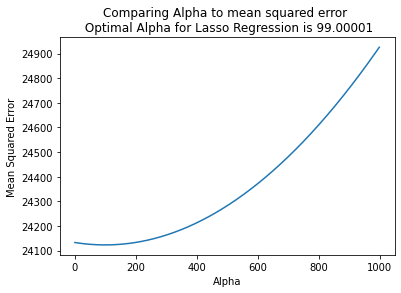

In [18]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Lasso

alphas = np.arange(0.00001,1000, 1)

mse_list = []
optimal_alpha = None
optimal_val_mse = np.inf

for alpha in alphas:
    Regressor = Lasso(alpha=alpha).fit(X_train,y_train)
    pred_val = Regressor.predict(X_val)
    mse_error = mean_squared_error(pred_val, y_val)
    mse_list.append(mse_error)
    if mse_error < optimal_val_mse:
        optimal_alpha = alpha
        optimal_val_mse = mse_error
        
plt.plot(mse_list)
plt.title('Comparing Alpha to mean squared error \n Optimal Alpha for Lasso Regression is {}'.format(optimal_alpha))
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.show()

Train on the entire data (Train + Val)

In [10]:
Regressor = Lasso(alpha=optimal_alpha).fit(X_tv, y_tv)
lasso_predict_tv = Regressor.predict(X_tv)
lasso_predict_test = Regressor.predict(X_test)

lasso_net_results = {'model':'Lasso Regression',
                    'train_mse' : round(mean_squared_error(y_tv, lasso_predict_tv),2),
                      'test mse' : round(mean_squared_error(y_test, lasso_predict_test),2),
                      'train_mae':round(mean_absolute_error(y_tv, lasso_predict_tv),2),
                      'test_mae':round(mean_absolute_error(y_test, lasso_predict_test),2)}
print(lasso_net_results)

{'model': 'Lasso Regression', 'train_mse': 22988.17, 'test mse': 22040.48, 'train_mae': 120.85, 'test_mae': 118.72}


#### 4.4. ElasticNet Regression (8 points)

In [11]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import ElasticNet

alphas = np.arange(0.00001,120, 1)
l1_ratios = np.arange(0,1.01,0.1)

mse_list = []
optimal_alpha = None
optimal_l1_ratio = None
optimal_val_mse = np.inf


for alpha in alphas:
    for l1_ratio in l1_ratios:
        Regressor = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=99999).fit(X_train,y_train)
        pred_val = Regressor.predict(X_val)
        mse_error = mean_squared_error(pred_val, y_val)
        mse_list.append(mse_error)
        if mse_error < optimal_val_mse:
            optimal_alpha = alpha
            optimal_l1_ratio = l1_ratio
            optimal_val_mse = mse_error
print('optimal alpha : {}, optimal l1 ratio: {}'.format(optimal_alpha, optimal_l1_ratio))

optimal alpha : 99.00001, optimal l1 ratio: 1.0


In [12]:
Regressor = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio).fit(X_tv, y_tv)
en_predict_tv = Regressor.predict(X_tv)
en_predict_test = Regressor.predict(X_test)

elastic_net_results = {'model': 'Elasticnet Regression',
                    'train_mse' : round(mean_squared_error(y_tv, en_predict_tv),2),
                      'test mse' : round(mean_squared_error(y_test, en_predict_test),2),
                      'train_mae':round(mean_absolute_error(y_tv, en_predict_tv),2),
                      'test_mae':round(mean_absolute_error(y_test, en_predict_test),2)}
print(elastic_net_results)

{'model': 'Elasticnet Regression', 'train_mse': 22988.17, 'test mse': 22040.48, 'train_mae': 120.85, 'test_mae': 118.72}


### 5. Analysis (8 points)

In [13]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.

sample = X_test[0:10]
sample['actual'] = y_test[0:10]
sample['Linear_regression'] = lr_predict_test[0:10]
sample['lasso_regression'] = lasso_predict_test[0:10]
sample['ridge_regression'] =ridge_predict_test[0:10]
sample['elasticnet_regression'] = en_predict_test[0:10]
sample

,x1,x2,actual,Linear_regression,lasso_regression,ridge_regression,elasticnet_regression
1801,-16.90,38.71,66.12,61.235630,60.929189,61.177472,60.929189
1190,-19.19,-47.20,-572.89,-576.474002,-574.365079,-576.673464,-574.365079
1817,-16.78,13.97,-94.71,-112.489283,-112.153647,-112.625511,-112.153647
251,-47.57,26.80,-306.84,-413.460170,-411.348882,-412.082437,-411.348882
2505,34.27,23.19,580.10,602.521612,599.111693,599.964358,599.111693
1117,-27.86,46.96,-34.05,-19.808152,-19.579344,-19.316636,-19.579344
1411,-38.08,43.70,-81.37,-172.968197,-171.952371,-171.996134,-171.952371
2113,19.99,48.67,552.60,601.278257,598.178510,599.480243,598.178510
408,2.82,-11.35,-24.39,-42.406417,-42.750232,-43.556525,-42.750232
2579,7.45,65.13,538.47,558.283905,555.612023,557.135328,555.612023


In [14]:
pd.DataFrame([lr_net_results, lasso_net_results, ridge_net_results,elastic_net_results])

,model,train_mse,test mse,train_mae,test_mae
0,Linear Regression,22978.79,22044.49,120.78,118.73
1,Lasso Regression,22988.17,22040.48,120.85,118.72
2,Ridge Regression,22981.26,22053.17,120.81,118.78
3,Elasticnet Regression,22988.17,22040.48,120.85,118.72


### 6. Final Observations (2 points)

####  Write down your final conclusions/observations.

Lasso regression outperforms every other model and we notice that the ridge regression performs 
worse than linear regression in both training and test. Elasticnet regression which is a combination of Lasso and Ridge regression has a hyperparameter L1 Ratio which on grid search turns out to be 1 i.e Elasticnet Regression is equivalent to Lasso regression.